Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib. Seaborn and Warning Library

In [107]:
#-- Basic Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#-- Modelling

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

Import the CSV Data as Pandas DataFrame

In [108]:
df=pd.read_csv("D:\Python\AI & ML\IStudio\StudentsPerformance_3_lyst1729690388778.csv")

In [109]:
df.head()           #-- Show Top 5 Records

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [110]:
#-- Preparing X and Y Variables

X = df.drop(columns=["math score"],axis=1)

In [111]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [112]:
X.shape

(1000, 7)

In [113]:
Y = df["math score"]
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [114]:
print("Categories in 'gender' variable: ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df["test preparation course"].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [115]:
#- Creation of transformer columns:

num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns

In [116]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_trans = StandardScaler()
oh_trans = OneHotEncoder()

prepocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_trans,cat_cols),
        ("StandardScaler",num_trans,num_cols)
    ]
)

In [117]:
x = prepocessor.fit_transform(X)

In [118]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [119]:
x.shape

(1000, 19)

In [120]:
#-- Preparing Train and Test Split data:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.25,random_state=42)

In [121]:
#-- Creating an evaluate function to give all metrics after model training:

def evaluate_model(true,predict):
    mae = mean_absolute_error(true,predict)
    mse = mean_squared_error(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    r2 = r2_score(true,predict)
    return mae,mse,rmse,r2


 

In [122]:
models = {
    "LR" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNN" : KNeighborsRegressor(),
    "DT" : DecisionTreeRegressor(),
    "RF" : RandomForestRegressor()
}

In [123]:
model_list = []
r2_list = []

In [124]:
print(x_train.shape)
print(y_train.shape)

(750, 19)
(750,)


In [125]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)          #-- Train the Model

    #-- Make Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #-- Evaluate Train and Test Dataset

    model_train_mae, model_train_rmse, model_train_r2, *_ = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2, *_ = evaluate_model(y_test, y_test_pred)  

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])  

    print("Model performance for Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------------------------")

    print("Model performance for Test Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('/n')



LR
Model performance for Training Set
- Root Mean Squared Error: 28.0608
- Mean Absolute Error: 4.2383
- R2 Score: 5.2972
----------------------------------------------------
Model performance for Test Set
- Root Mean Squared Error: 30.0581
- Mean Absolute Error: 4.3379
- R2 Score: 5.4825
/n
Lasso
Model performance for Training Set
- Root Mean Squared Error: 42.9223
- Mean Absolute Error: 5.1837
- R2 Score: 6.5515
----------------------------------------------------
Model performance for Test Set
- Root Mean Squared Error: 44.2775
- Mean Absolute Error: 5.2217
- R2 Score: 6.6541
/n
Ridge
Model performance for Training Set
- Root Mean Squared Error: 28.0642
- Mean Absolute Error: 4.2368
- R2 Score: 5.2976
----------------------------------------------------
Model performance for Test Set
- Root Mean Squared Error: 30.0173
- Mean Absolute Error: 4.3354
- R2 Score: 5.4788
/n
KNN
Model performance for Training Set
- Root Mean Squared Error: 33.4365
- Mean Absolute Error: 4.5808
- R2 Score:

In [126]:
#Results

pd.DataFrame(list(zip(model_list, r2_list)), columns=["Modesl Name", "R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Modesl Name,R2_Score
4,DT,7.538700
3,KNN,7.136240
1,Lasso,6.654136
5,RF,6.067111
0,LR,5.482528
2,Ridge,5.478806


In [127]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)

y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model  %.2f" %score)

Accuracy of the model  87.78


Text(0, 0.5, 'Predicted')

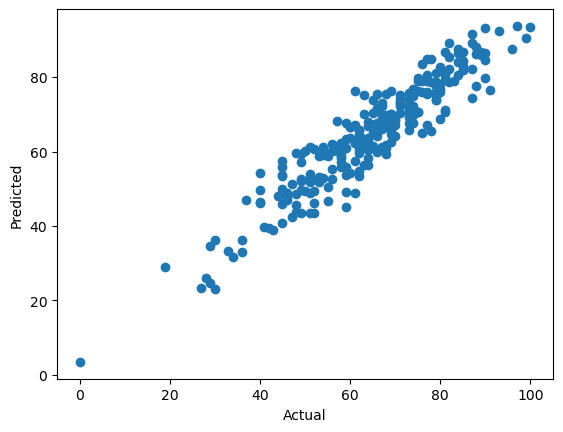

In [128]:
#-- Plot y_pred and y_test

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

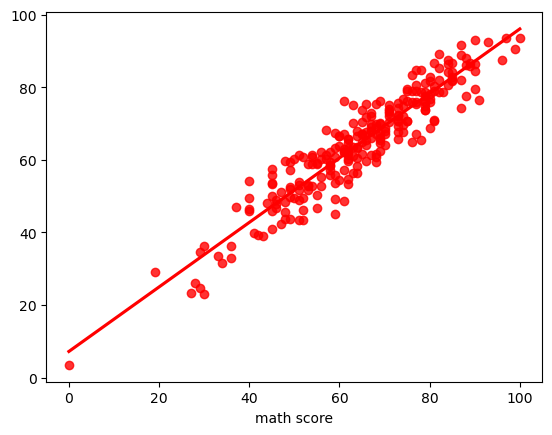

In [129]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [130]:
#-- Diifferance between Actual and Predicted Value:

pred_df = pd.DataFrame({'Actual Value': y_test , 'Predicted Value': y_pred, 'Differance': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Differance
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
...,...,...,...
109,70,64.035129,5.964871
430,64,63.158496,0.841504
77,80,82.733853,-2.733853
84,42,39.387374,2.612626
